## Libraries

In [1]:
# Import packages

import numpy as np
from math import sqrt
from random import randint

import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import cross_validate, cross_val_score, cross_val_predict, KFold, GridSearchCV
from sklearn.feature_selection import RFE, SelectKBest, chi2
from sklearn.linear_model import LogisticRegression, Ridge, RidgeCV, LinearRegression, Lasso, LassoCV, ElasticNet, ElasticNetCV
from sklearn.metrics import mean_squared_error, r2_score, median_absolute_error, make_scorer
from sklearn.cross_decomposition import PLSCanonical, PLSRegression
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.svm import SVR

import warnings
import statistics 
import statsmodels.api as sm

from IPython.display import display, Markdown

In [2]:
    
def read_csv_func(csv):
    # Read data set 
    #str(csv).split(".")[0]
    df = pd.read_csv(csv) 
    df.set_index('index', inplace=True)
    #number of rows, number of columns
    #print(df.info())
    return df



In [3]:
def split(df):
    split = df.groupby('set')
    test = split.get_group('TEST')
    training = split.get_group('TRAINING')

    df_Test = test.apply(lambda x: x)
    df_Training = training.apply(lambda x: x)
    X_test = df_Test.drop(columns=['Log_MP_RATIO','set'])
    X_train = df_Training .drop(columns=['Log_MP_RATIO','set'])
    y_test = df_Test['Log_MP_RATIO']
    y_train = df_Training['Log_MP_RATIO']
    return X_test, X_train, y_test, y_train

In [4]:
# Ridge Regression

def ridgeRegression(df): # df need to have the column 'set' to split the data
    
    X_test, X_train, y_test, y_train = split(df)
    
    # Create linear regression object
    ridge = KernelRidge(alpha=200.0)

    models_acronyme = [ridge]
    models_name = ["Ridge Regression"]

    fig = plt.figure(figsize=(7, 6))
    x_fig = 1
    y_fig = 1
    nb_fig = x_fig * y_fig

    fig = plt.figure(figsize=(7, 6))

    i = 0
    for index_model in models_acronyme:
        # Train the model using the training sets
        result_train = index_model.fit(X_train, y_train)
        y_pred_train = index_model.predict(X_train)
        
        #ax.annotate=('text')
        
        # Print outputs
        print(models_name[i])
        print('\nTRAIN')
        print('\tR2 train: %.2f' % r2_score(y_train, y_pred_train))
        rmse = sqrt(mean_squared_error(y_train, y_pred_train))
        print('\tRMSE train: %.2f' % rmse)

        print('\nCROSS-VALIDATION')
        clf = RidgeCV(alphas=[1e-3, 1e-2, 1e-1, 1]).fit(X_train, y_train)
        print('\tQ2 cross-validation: %.2f' % clf.score(X_train, y_train))
        kfold = KFold(n_splits=5)
        y_pred_cv = clf.predict(X_train)
        rmse = sqrt(mean_squared_error(y_train, y_pred_cv))
        print('\tRMSE cross-validation: %.2f' % rmse)

        # Make predictions using the testing set
        #result_train = index_model.fit(X_train, y_train_)
        y_pred_test = index_model.predict(X_test)

        # Print outputs scores
        # Explained variance score: 1 is perfect prediction
        print('\nTEST')
        # R2 score
        print('\tR2 test: %.2f' % r2_score(y_test, y_pred_test))
        rmse = sqrt(mean_squared_error(y_test, y_pred_test))
        print('\tRMSE test: %.2f' % rmse)

        # Plot outputs
        ax = fig.add_subplot(x_fig,y_fig,i+1)
        ax.scatter(y_train, y_pred_train, c='green', label='Train')
        ax.scatter(y_test, y_pred_test,c='blue',label='Test')
        ax.plot([min(y_train)-1,max(y_train)+1], [min(y_train)-1,max(y_train)+1], '--k',c='black')
        plt.xlim((min(y_train)-2,max(y_train)+1))
        plt.ylim((min(y_train)-1,max(y_train)+1))
        plt.title(models_name[i])
        plt.legend(loc='lower right')

        ax.set_ylabel("True Target",fontsize=14)
        ax.set_xlabel("Target predicted",fontsize=14)

        i = i + 1

    #plt.savefig('results_1_1_before_RR.png')
    plt.show()

In [5]:
# Lasso Regression


warnings.filterwarnings('ignore')

def lassoRegression(df): # df need to have the column 'set' to split the data
    
    X_test, X_train, y_test, y_train = split(df)
    
    # Create linear regression object
    lasso = Lasso(alpha=0.05)

    models_acronyme = [lasso]
    models_name = ["Lasso Regression"]

    fig = plt.figure(figsize=(7, 6))
    x_fig = 1
    y_fig = 1
    nb_fig = x_fig * y_fig

    fig = plt.figure(figsize=(7, 6))

    i = 0
    for index_model in models_acronyme:
        # Train the model using the training sets
        result_train = index_model.fit(X_train, y_train)
        y_pred_train = index_model.predict(X_train)

        # Print outputs
        print(models_name[i])
        print('\nTRAIN')
        print('\tR2 train: %.2f' % r2_score(y_train, y_pred_train))
        rmse = sqrt(mean_squared_error(y_train, y_pred_train))
        print('\tRMSE train: %.2f' % rmse)

        print('\nCROSS-VALIDATION')
        clf = LassoCV(cv=5, random_state=0).fit(X_train, y_train)
        print('\tQ2 cross-validation: %.2f' % clf.score(X_train, y_train))
        y_pred_cv = clf.predict(X_train)
        rmse = sqrt(mean_squared_error(y_train, y_pred_cv))
        print('\tRMSE cross-validation: %.2f' % rmse)

        # Make predictions using the testing set
        y_pred_test = index_model.predict(X_test)

        # Print outputs scores
        # Explained variance score: 1 is perfect prediction
        print('\nTEST')
        # R2 score
        print('\tR2 test: %.2f' % r2_score(y_test, y_pred_test))
        rmse = sqrt(mean_squared_error(y_test, y_pred_test))
        print('\tRMSE test: %.2f' % rmse)

        # Plot outputs
        ax = fig.add_subplot(x_fig,y_fig,i+1)
        ax.scatter(y_train, y_pred_train, c='green', label='Train')
        ax.scatter(y_test, y_pred_test,c='blue',label='Test')
        ax.plot([min(y_train)-1,max(y_train)+1], [min(y_train)-1,max(y_train)+1], '--k',c='black')
        plt.xlim((min(y_train)-2,max(y_train)+1))
        plt.ylim((min(y_train)-1,max(y_train)+1))
        plt.title(models_name[i])
        plt.legend(loc='lower right')

        ax.set_ylabel("True Target",fontsize=14)
        ax.set_xlabel("Target predicted",fontsize=14)

        i = i + 1

    #plt.savefig('results_1_1_before_LR.png')
    plt.show()

In [6]:
# Elastic Net

def elasticNet(df): # df need to have the column 'set' to split the data
    
    X_test, X_train, y_test, y_train = split(df)

    # Create elastic net object
    en = ElasticNet(alpha=0.00000001, random_state=0, positive=True)

    models_acronyme = [en]
    models_name = ["Elastic Net"]

    fig = plt.figure(figsize=(7, 6))
    x_fig = 1
    y_fig = 1
    nb_fig = x_fig * y_fig

    fig = plt.figure(figsize=(7, 6))

    i = 0
    for index_model in models_acronyme:
        # Train the model using the training sets
        result_train = index_model.fit(X_train, y_train)
        y_pred_train = index_model.predict(X_train)

        # Print outputs
        print(models_name[i])
        print('\nTRAIN')
        print('\tR2 train: %.2f' % r2_score(y_train, y_pred_train))
        rmse = sqrt(mean_squared_error(y_train, y_pred_train))
        print('\tRMSE train: %.2f' % rmse)

        print('\nCROSS-VALIDATION')
        clf = ElasticNetCV(cv=5, random_state=0).fit(X_train, y_train)
        print('\tQ2 cross-validation: %.2f' % clf.score(X_train, y_train))
        y_pred_cv = clf.predict(X_train)
        rmse = sqrt(mean_squared_error(y_train, y_pred_cv))
        print('\tRMSE cross-validation: %.2f' % rmse)

        # Make predictions using the testing set
        y_pred_test = index_model.predict(X_test)

        # Print outputs scores
        # Explained variance score: 1 is perfect prediction
        print('\nTEST')
        # R2 score
        print('\tR2 test: %.2f' % r2_score(y_test, y_pred_test))
        rmse = sqrt(mean_squared_error(y_test, y_pred_test))
        print('\tRMSE test: %.2f' % rmse)

        # Plot outputs
        ax = fig.add_subplot(x_fig,y_fig,i+1)
        ax.scatter(y_train, y_pred_train, c='green', label='Train')
        ax.scatter(y_test, y_pred_test,c='blue',label='Test')
        ax.plot([min(y_train)-1,max(y_train)+1], [min(y_train)-1,max(y_train)+1], '--k',c='black')
        plt.xlim((min(y_train)-2,max(y_train)+1))
        plt.ylim((min(y_train)-1,max(y_train)+1))
        plt.title(models_name[i])
        plt.legend(loc='lower right')

        ax.set_ylabel("True Target",fontsize=14)
        ax.set_xlabel("Target predicted",fontsize=14)

        i = i + 1

    #plt.savefig('results_1_1_before_EN.png')
    plt.show()

In [7]:
# Support Vector Machine (SVM)

def supportVectorMachine(df): # df need to have the column 'set' to split the data
    
    X_test, X_train, y_test, y_train = split(df)

    # Create SVM object
    parameters = {'kernel': ('linear', 'rbf','poly'), 'C':[1.5, 10],'gamma': [1e-7, 1e-4],'epsilon':[0.1,0.2,0.5,0.3]}
    svm = SVR(epsilon=0.4, kernel='linear', gamma=1e-4, C=10)

    models_acronyme = [svm]
    models_name = ["Support Vector Machine"]

    fig = plt.figure(figsize=(7, 6))
    x_fig = 1
    y_fig = 1
    nb_fig = x_fig * y_fig

    fig = plt.figure(figsize=(7, 6))

    i = 0
    for index_model in models_acronyme:
        # Train the model using the training sets
        result_train = index_model.fit(X_train, y_train)
        y_pred_train = index_model.predict(X_train)

        # Print outputs
        print(models_name[i])
        print('\nTRAIN')
        print('\tR2 train: %.2f' % r2_score(y_train, y_pred_train))
        rmse = sqrt(mean_squared_error(y_train, y_pred_train))
        print('\tRMSE train: %.2f' % rmse)

        print('\nCROSS-VALIDATION') 
        # defining parameter range 
        param_grid = {'C': [10],  
                      'epsilon':[0.4],
                      'gamma': [1e-4], 
                      'kernel': ['linear']}  
        scoring = make_scorer(r2_score)
        g_cv = GridSearchCV(svm,
                            param_grid,
                            scoring=scoring, cv=5, refit=True)

        g_cv.fit(X_train, y_train)
        g_cv.best_params_

        result = g_cv.cv_results_
        print('\tQ2 cross-validation: %.2f' % r2_score(y_test, g_cv.best_estimator_.predict(X_test)))

        scoring = make_scorer(mean_squared_error)
        g_cv = GridSearchCV(svm,
                            param_grid,
                            scoring=scoring, cv=5, refit=True)

        g_cv.fit(X_train, y_train)
        g_cv.best_params_

        result = g_cv.cv_results_
        print('\tRMSE cross-validation: %.2f' % mean_squared_error(y_test, g_cv.best_estimator_.predict(X_test), squared=False))


        # Make predictions using the testing set
        y_pred_test = index_model.predict(X_test)

        # Print outputs scores
        # Explained variance score: 1 is perfect prediction
        print('\nTEST')
        # R2 score
        print('\tR2 test: %.2f' % r2_score(y_test, y_pred_test))
        rmse = sqrt(mean_squared_error(y_test, y_pred_test))
        print('\tRMSE test: %.2f' % rmse)

        # Plot outputs
        ax = fig.add_subplot(x_fig,y_fig,i+1)
        ax.scatter(y_train, y_pred_train, c='green', label='Train')
        ax.scatter(y_test, y_pred_test,c='blue',label='Test')
        ax.plot([min(y_train)-1,max(y_train)+1], [min(y_train)-1,max(y_train)+1], '--k',c='black')
        plt.xlim((min(y_train)-2,max(y_train)+1))
        plt.ylim((min(y_train)-1,max(y_train)+1))
        plt.title(models_name[i])
        plt.legend(loc='lower right')

        ax.set_ylabel("True Target",fontsize=14)
        ax.set_xlabel("Target predicted",fontsize=14)

        i = i + 1

    #plt.savefig('results_1_1_before_SVM.png')
    plt.show()

In [8]:
# Random Forest model    <- tres long a executer


def randomForest(df):

    X_test, X_train, y_test, y_train = split(df)
    
    # Create linear regression object
    rf = RandomForestRegressor(n_estimators=1000,max_depth=10,criterion='mae')

    models_acronyme = [rf]
    models_name = ["Random Forest"]

    fig = plt.figure(figsize=(7, 6))
    x_fig = 1
    y_fig = 1
    nb_fig = x_fig * y_fig

    fig = plt.figure(figsize=(7, 6))

    i = 0
    for index_model in models_acronyme:
        # Train the model using the training sets
        result_train = index_model.fit(X_train, y_train)
        y_pred_train = index_model.predict(X_train)

        # Print outputs
        print(models_name[i])
        print('\nTRAIN')
        print('\tR2 train: %.2f' % r2_score(y_train, y_pred_train))
        rmse = sqrt(mean_squared_error(y_train, y_pred_train))
        print('\tRMSE train: %.2f' % rmse)

        print('\nCROSS-VALIDATION')
        scores = cross_val_score(rf, X_train, y_train, scoring='r2')
        print('\tQ2 cross-validation: %.2f' % statistics.mean(scores))
        scores = cross_val_score(rf, X_train, y_train, scoring='neg_mean_absolute_error')
        print('\tRMSE cross-validation: %.2f' % abs(statistics.mean(scores)))

        # Make predictions using the testing set
        y_pred_test = index_model.predict(X_test)

        # Print outputs scores
        # Explained variance score: 1 is perfect prediction
        print('\nTEST')
        # R2 score
        print('\tR2 test: %.2f' % r2_score(y_test, y_pred_test))
        rmse = sqrt(mean_squared_error(y_test, y_pred_test))
        print('\tRMSE test: %.2f' % rmse)

        # Plot outputs
        ax = fig.add_subplot(x_fig,y_fig,i+1)
        ax.scatter(y_train, y_pred_train, c='green', label='Train')
        ax.scatter(y_test, y_pred_test,c='blue',label='Test')
        ax.plot([min(y_train)-1,max(y_train)+1], [min(y_train)-1,max(y_train)+1], '--k',c='black')
        plt.xlim((min(y_train)-2,max(y_train)+1))
        plt.ylim((min(y_train)-1,max(y_train)+1))
        plt.title(models_name[i])
        plt.legend(loc='lower right')

        ax.set_ylabel("True Target",fontsize=14)
        ax.set_xlabel("Target predicted",fontsize=14)

        i = i + 1

    #plt.savefig('results_1_1_before_RF.png')
    plt.show()

In [9]:
# Partial Least Square model


def partialLeastSquare(df):    
    
    X_test, X_train, y_test, y_train = split(df)

    # Create linear regression object
    pls2 = PLSRegression(n_components=21)  
    #pls2 = PLSCanonical(n_components=10,algorithm='nipals')  

    models_acronyme = [pls2]
    models_name = ["Partial Least Square"]

    fig = plt.figure(figsize=(7, 6))
    x_fig = 1
    y_fig = 1
    nb_fig = x_fig * y_fig

    fig = plt.figure(figsize=(7, 6))

    i = 0
    for index_model in models_acronyme:
        # Train the model using the training sets
        result_train = index_model.fit(X_train, y_train)
        y_pred_train = index_model.predict(X_train)

        # Print outputs
        print(models_name[i])
        print('\nTRAIN')
        print('\tR2 train: %.2f' % r2_score(y_train, y_pred_train))
        rmse = sqrt(mean_squared_error(y_train, y_pred_train))
        print('\tRMSE train: %.2f' % rmse)

        print('\nCROSS-VALIDATION')
        scores = cross_val_score(pls2, X_train, y_train, scoring='r2')
        print('\tQ2 cross-validation: %.2f' % statistics.mean(scores))
        scores = cross_val_score(pls2, X_train, y_train, scoring='neg_mean_absolute_error')
        print('\tRMSE cross-validation: %.2f' % abs(statistics.mean(scores)))

        # Make predictions using the testing set
        y_pred_test = index_model.predict(X_test)

        # Print outputs scores
        # Explained variance score: 1 is perfect prediction
        print('\nTEST')
        # R2 score
        print('\tR2 test: %.2f' % r2_score(y_test, y_pred_test))
        rmse = sqrt(mean_squared_error(y_test, y_pred_test))
        print('\tRMSE test: %.2f' % rmse)

        # Plot outputs
        ax = fig.add_subplot(x_fig,y_fig,i+1)
        ax.scatter(y_train, y_pred_train, c='green', label='Train')
        ax.scatter(y_test, y_pred_test,c='blue',label='Test')
        ax.plot([min(y_train)-1,max(y_train)+1], [min(y_train)-1,max(y_train)+1], '--k',c='black')
        plt.xlim((min(y_train)-2,max(y_train)+1))
        plt.ylim((min(y_train)-1,max(y_train)+1))
        plt.title(models_name[i])
        plt.legend(loc='lower right')

        ax.set_ylabel("True Target",fontsize=14)
        ax.set_xlabel("Target predicted",fontsize=14)

        i = i + 1

    #plt.savefig('results_1_1_before_PLS.png')
    plt.show()

In [10]:
## 

In [11]:
# decision tree regressor

def decisionTree(df):
    X_test, X_train, y_test, y_train = split(df)
    
    # Create knn object
    dt = DecisionTreeRegressor(random_state=1, max_depth=11)

    models_acronyme = [dt]
    models_name = ["Decision tree regressor"]

    fig = plt.figure(figsize=(7, 6))
    x_fig = 1
    y_fig = 1
    nb_fig = x_fig * y_fig

    fig = plt.figure(figsize=(7, 6))

    i = 0
    for index_model in models_acronyme:
        # Train the model using the training sets
        result_train = index_model.fit(X_train, y_train)
        y_pred_train = index_model.predict(X_train)

        # Print outputs
        print(models_name[i])
        print('\nTRAIN')
        print('\tR2 train: %.2f' % r2_score(y_train, y_pred_train))
        rmse = sqrt(mean_squared_error(y_train, y_pred_train))
        print('\tRMSE train: %.2f' % rmse)

        print('\nCROSS-VALIDATION')    
        scoring = make_scorer(r2_score)
        g_cv = GridSearchCV(dt,
                param_grid={'min_samples_split': range(2, 10)},
                scoring=scoring, cv=5, refit=True)

        g_cv.fit(X_train, y_train)
        g_cv.best_params_

        result = g_cv.cv_results_
        print('\tQ2 cross-validation: %.2f' % r2_score(y_test, g_cv.best_estimator_.predict(X_test)))

        scoring = make_scorer(mean_squared_error)
        g_cv = GridSearchCV(dt,
                param_grid={'min_samples_split': range(2, 10)},
                scoring=scoring, cv=5, refit=True)

        g_cv.fit(X_train, y_train)
        g_cv.best_params_

        result = g_cv.cv_results_
        print('\tRMSE cross-validation: %.2f' % mean_squared_error(y_test, g_cv.best_estimator_.predict(X_test), squared=False))

        # Make predictions using the testing set
        y_pred_test = index_model.predict(X_test)

        # Print outputs scores
        # Explained variance score: 1 is perfect prediction
        print('\nTEST')
        # R2 score
        print('\tR2 test: %.2f' % r2_score(y_test, y_pred_test))
        rmse = sqrt(mean_squared_error(y_test, y_pred_test))
        print('\tRMSE test: %.2f' % rmse)

        # Plot outputs
        ax = fig.add_subplot(x_fig,y_fig,i+1)
        ax.scatter(y_train, y_pred_train, c='green', label='Train')
        ax.scatter(y_test, y_pred_test,c='blue',label='Test')
        ax.plot([min(y_train),max(y_train)], [min(y_train),max(y_train)], '--k',c='black')
        plt.xlim((min(y_train),max(y_train)))
        plt.ylim((min(y_train),max(y_train)))
        plt.title(models_name[i])
        plt.legend(loc='lower right')

        ax.set_ylabel("True Target",fontsize=14)
        ax.set_xlabel("Target predicted",fontsize=14)

        i = i + 1

    #plt.savefig('results_1_1_before_DTR.png')
    plt.show()

standardized_df.csv
Ridge Regression

TRAIN
	R2 train: 0.74
	RMSE train: 0.34

CROSS-VALIDATION
	Q2 cross-validation: 1.00
	RMSE cross-validation: 0.04

TEST
	R2 test: -0.41
	RMSE test: 0.36


<Figure size 504x432 with 0 Axes>

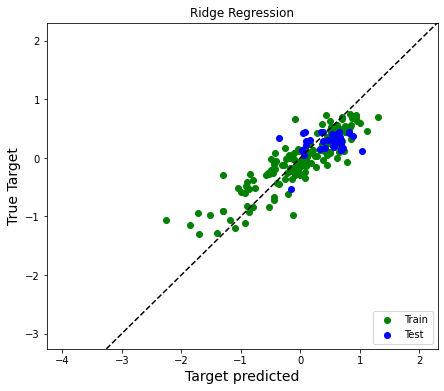

drop_correlated_features.csv
Ridge Regression

TRAIN
	R2 train: 0.67
	RMSE train: 0.38

CROSS-VALIDATION
	Q2 cross-validation: 0.97
	RMSE cross-validation: 0.11

TEST
	R2 test: -0.48
	RMSE test: 0.37


<Figure size 504x432 with 0 Axes>

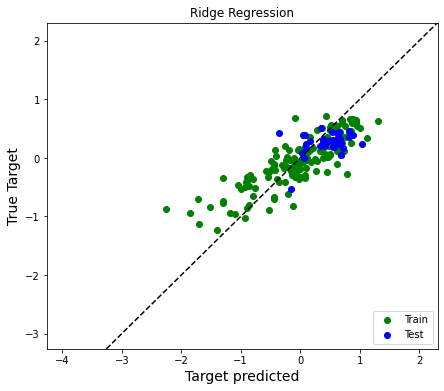

features_correlated_with_y.csv
Ridge Regression

TRAIN
	R2 train: 0.39
	RMSE train: 0.52

CROSS-VALIDATION
	Q2 cross-validation: 0.47
	RMSE cross-validation: 0.49

TEST
	R2 test: -0.09
	RMSE test: 0.32


<Figure size 504x432 with 0 Axes>

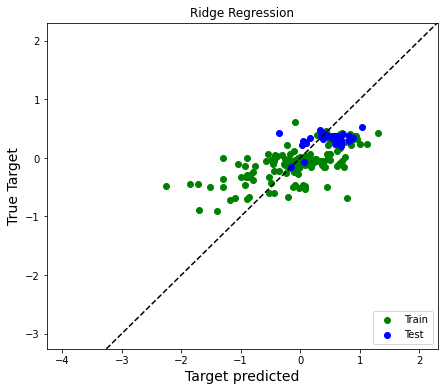

df_SelectKBest.csv
Ridge Regression

TRAIN
	R2 train: 0.64
	RMSE train: 0.40

CROSS-VALIDATION
	Q2 cross-validation: 0.98
	RMSE cross-validation: 0.10

TEST
	R2 test: -0.07
	RMSE test: 0.32


<Figure size 504x432 with 0 Axes>

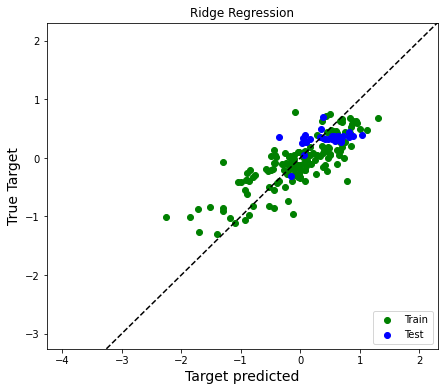

df_pca.csv
Ridge Regression

TRAIN
	R2 train: 0.25
	RMSE train: 0.58

CROSS-VALIDATION
	Q2 cross-validation: 0.26
	RMSE cross-validation: 0.58

TEST
	R2 test: 0.11
	RMSE test: 0.29


<Figure size 504x432 with 0 Axes>

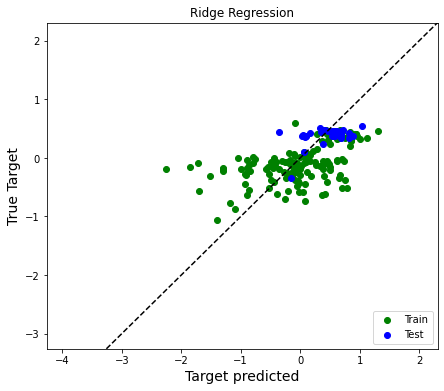

standardized_df.csv
Lasso Regression

TRAIN
	R2 train: 0.61
	RMSE train: 0.42

CROSS-VALIDATION
	Q2 cross-validation: 0.59
	RMSE cross-validation: 0.43

TEST
	R2 test: 0.11
	RMSE test: 0.29


<Figure size 504x432 with 0 Axes>

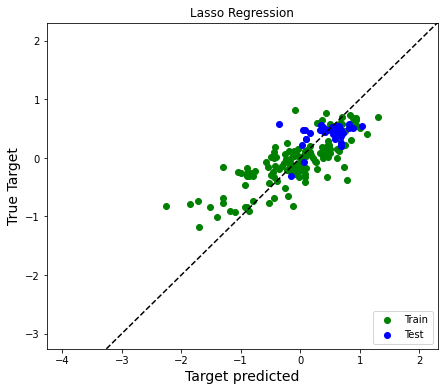

drop_correlated_features.csv
Lasso Regression

TRAIN
	R2 train: 0.61
	RMSE train: 0.42

CROSS-VALIDATION
	Q2 cross-validation: 0.66
	RMSE cross-validation: 0.39

TEST
	R2 test: 0.07
	RMSE test: 0.29


<Figure size 504x432 with 0 Axes>

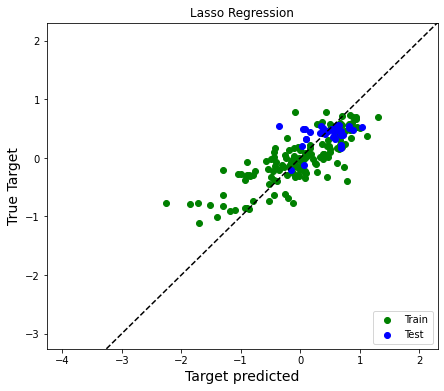

features_correlated_with_y.csv
Lasso Regression

TRAIN
	R2 train: 0.46
	RMSE train: 0.49

CROSS-VALIDATION
	Q2 cross-validation: 0.47
	RMSE cross-validation: 0.49

TEST
	R2 test: 0.19
	RMSE test: 0.27


<Figure size 504x432 with 0 Axes>

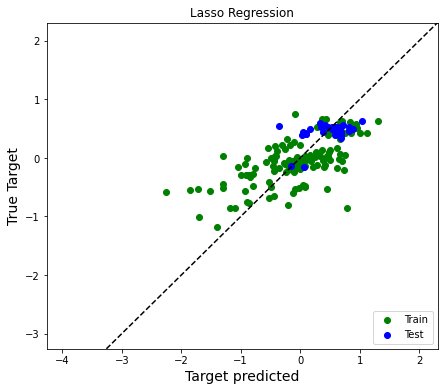

df_SelectKBest.csv
Lasso Regression

TRAIN
	R2 train: 0.58
	RMSE train: 0.44

CROSS-VALIDATION
	Q2 cross-validation: 0.57
	RMSE cross-validation: 0.44

TEST
	R2 test: 0.16
	RMSE test: 0.28


<Figure size 504x432 with 0 Axes>

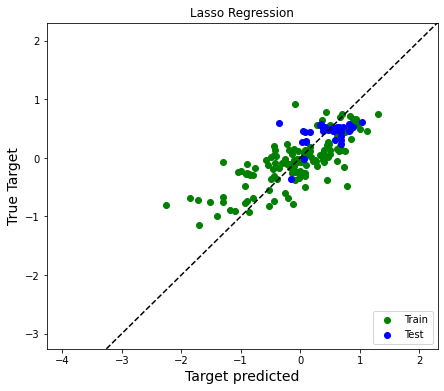

df_pca.csv
Lasso Regression

TRAIN
	R2 train: 0.26
	RMSE train: 0.58

CROSS-VALIDATION
	Q2 cross-validation: 0.26
	RMSE cross-validation: 0.58

TEST
	R2 test: 0.17
	RMSE test: 0.28


<Figure size 504x432 with 0 Axes>

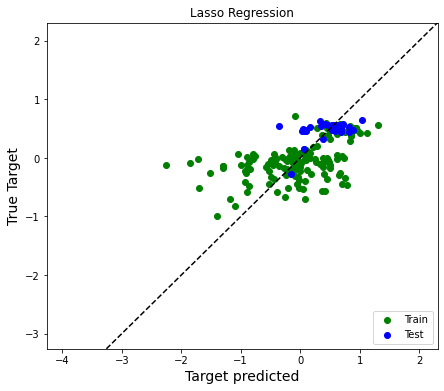

standardized_df.csv
Elastic Net

TRAIN
	R2 train: 0.97
	RMSE train: 0.11

CROSS-VALIDATION
	Q2 cross-validation: 0.62
	RMSE cross-validation: 0.41

TEST
	R2 test: -6.93
	RMSE test: 0.86


<Figure size 504x432 with 0 Axes>

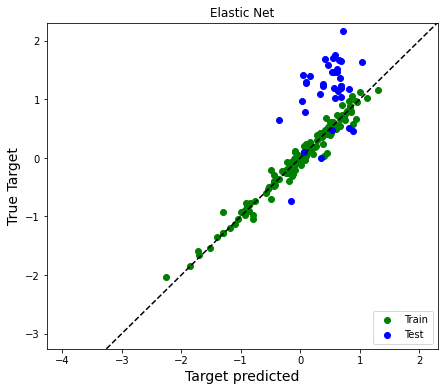

drop_correlated_features.csv
Elastic Net

TRAIN
	R2 train: 0.68
	RMSE train: 0.38

CROSS-VALIDATION
	Q2 cross-validation: 0.65
	RMSE cross-validation: 0.39

TEST
	R2 test: -0.75
	RMSE test: 0.40


<Figure size 504x432 with 0 Axes>

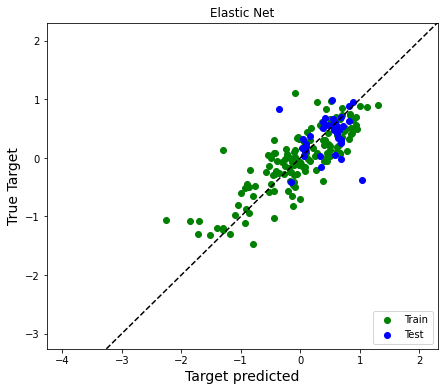

features_correlated_with_y.csv
Elastic Net

TRAIN
	R2 train: 0.34
	RMSE train: 0.54

CROSS-VALIDATION
	Q2 cross-validation: 0.47
	RMSE cross-validation: 0.49

TEST
	R2 test: -0.45
	RMSE test: 0.37


<Figure size 504x432 with 0 Axes>

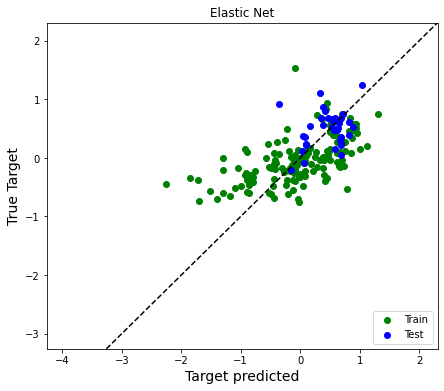

df_SelectKBest.csv
Elastic Net

TRAIN
	R2 train: 0.84
	RMSE train: 0.26

CROSS-VALIDATION
	Q2 cross-validation: 0.57
	RMSE cross-validation: 0.44

TEST
	R2 test: -1.23
	RMSE test: 0.45


<Figure size 504x432 with 0 Axes>

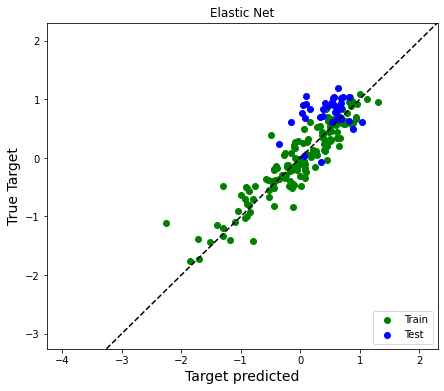

df_pca.csv
Elastic Net

TRAIN
	R2 train: 0.02
	RMSE train: 0.66

CROSS-VALIDATION
	Q2 cross-validation: 0.26
	RMSE cross-validation: 0.58

TEST
	R2 test: -2.21
	RMSE test: 0.55


<Figure size 504x432 with 0 Axes>

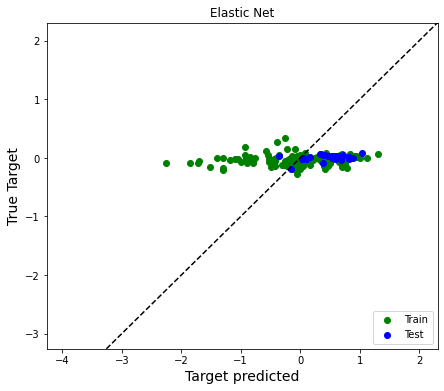

standardized_df.csv
Support Vector Machine

TRAIN
	R2 train: 0.78
	RMSE train: 0.31

CROSS-VALIDATION
	Q2 cross-validation: -0.55
	RMSE cross-validation: 0.38

TEST
	R2 test: -0.55
	RMSE test: 0.38


<Figure size 504x432 with 0 Axes>

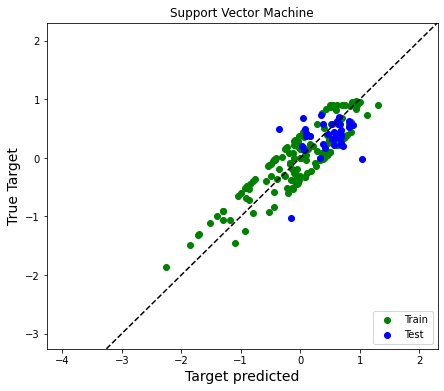

drop_correlated_features.csv
Support Vector Machine

TRAIN
	R2 train: 0.77
	RMSE train: 0.32

CROSS-VALIDATION
	Q2 cross-validation: -0.55
	RMSE cross-validation: 0.38

TEST
	R2 test: -0.55
	RMSE test: 0.38


<Figure size 504x432 with 0 Axes>

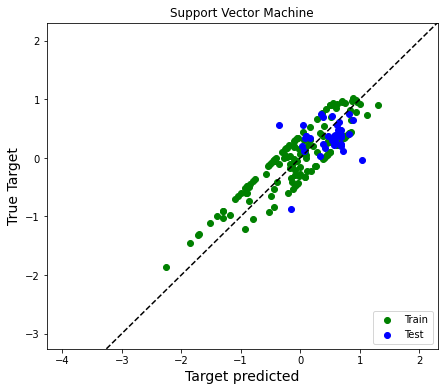

features_correlated_with_y.csv
Support Vector Machine

TRAIN
	R2 train: 0.46
	RMSE train: 0.49

CROSS-VALIDATION
	Q2 cross-validation: 0.17
	RMSE cross-validation: 0.28

TEST
	R2 test: 0.17
	RMSE test: 0.28


<Figure size 504x432 with 0 Axes>

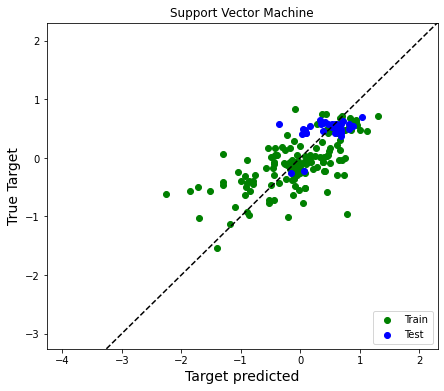

df_SelectKBest.csv
Support Vector Machine

TRAIN
	R2 train: 0.78
	RMSE train: 0.31

CROSS-VALIDATION
	Q2 cross-validation: -0.30
	RMSE cross-validation: 0.35

TEST
	R2 test: -0.30
	RMSE test: 0.35


<Figure size 504x432 with 0 Axes>

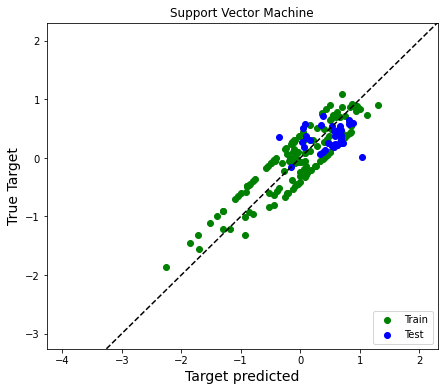

df_pca.csv
Support Vector Machine

TRAIN
	R2 train: 0.25
	RMSE train: 0.58

CROSS-VALIDATION
	Q2 cross-validation: 0.14
	RMSE cross-validation: 0.28

TEST
	R2 test: 0.14
	RMSE test: 0.28


<Figure size 504x432 with 0 Axes>

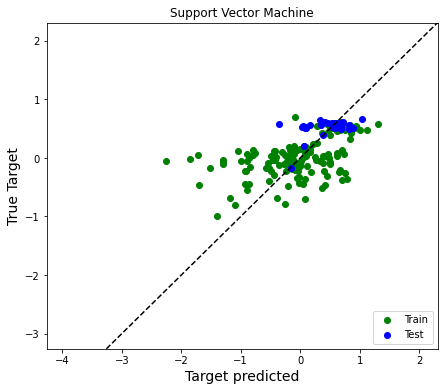

standardized_df.csv
Random Forest

TRAIN
	R2 train: 0.94
	RMSE train: 0.16

CROSS-VALIDATION
	Q2 cross-validation: 0.44
	RMSE cross-validation: 0.36

TEST
	R2 test: -0.09
	RMSE test: 0.32


<Figure size 504x432 with 0 Axes>

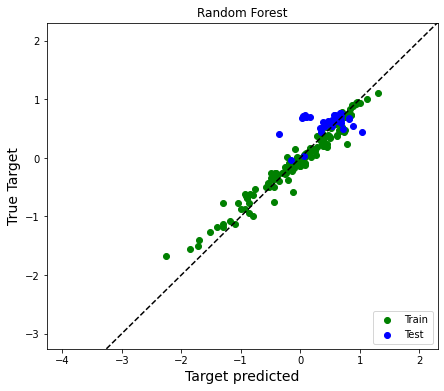

drop_correlated_features.csv
Random Forest

TRAIN
	R2 train: 0.93
	RMSE train: 0.18

CROSS-VALIDATION
	Q2 cross-validation: 0.37
	RMSE cross-validation: 0.37

TEST
	R2 test: -0.07
	RMSE test: 0.31


<Figure size 504x432 with 0 Axes>

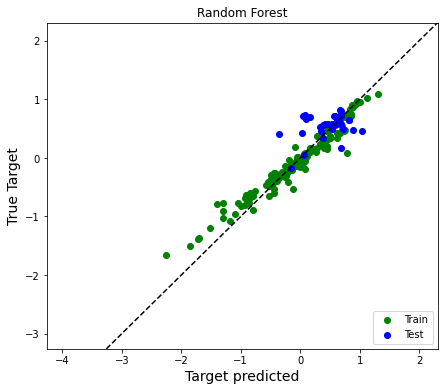

features_correlated_with_y.csv
Random Forest

TRAIN
	R2 train: 0.91
	RMSE train: 0.20

CROSS-VALIDATION
	Q2 cross-validation: 0.36
	RMSE cross-validation: 0.38

TEST
	R2 test: 0.01
	RMSE test: 0.30


<Figure size 504x432 with 0 Axes>

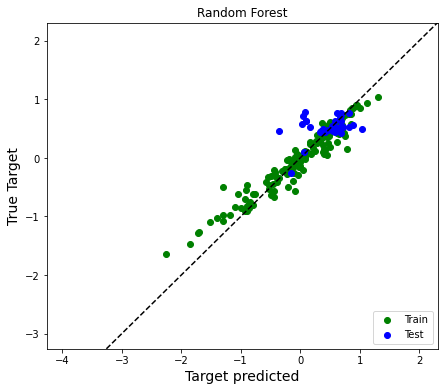

df_SelectKBest.csv
Random Forest

TRAIN
	R2 train: 0.94
	RMSE train: 0.16

CROSS-VALIDATION
	Q2 cross-validation: 0.43
	RMSE cross-validation: 0.36

TEST
	R2 test: -0.09
	RMSE test: 0.32


<Figure size 504x432 with 0 Axes>

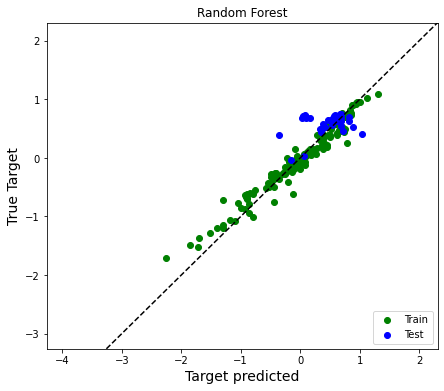

df_pca.csv
Random Forest

TRAIN
	R2 train: 0.90
	RMSE train: 0.21

CROSS-VALIDATION
	Q2 cross-validation: 0.32
	RMSE cross-validation: 0.41

TEST
	R2 test: -0.40
	RMSE test: 0.36


<Figure size 504x432 with 0 Axes>

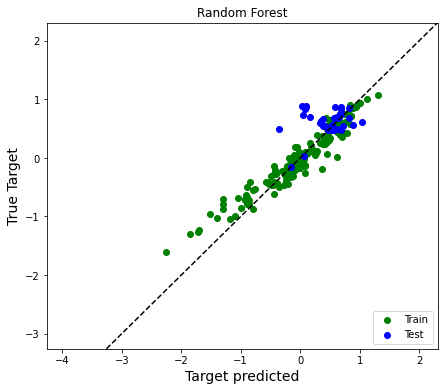

standardized_df.csv
Partial Least Square

TRAIN
	R2 train: 0.98
	RMSE train: 0.09

CROSS-VALIDATION
	Q2 cross-validation: -0.44
	RMSE cross-validation: 0.55

TEST
	R2 test: -1.80
	RMSE test: 0.51


<Figure size 504x432 with 0 Axes>

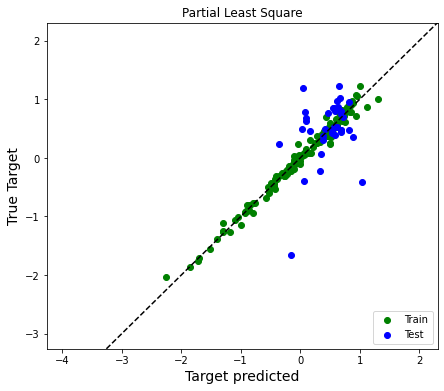

drop_correlated_features.csv
Partial Least Square

TRAIN
	R2 train: 0.96
	RMSE train: 0.14

CROSS-VALIDATION
	Q2 cross-validation: -1.33
	RMSE cross-validation: 0.63

TEST
	R2 test: -2.84
	RMSE test: 0.60


<Figure size 504x432 with 0 Axes>

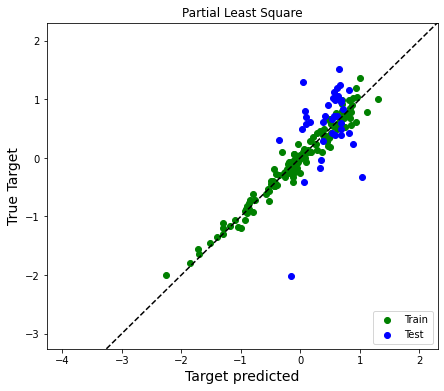

features_correlated_with_y.csv
Partial Least Square

TRAIN
	R2 train: 0.47
	RMSE train: 0.49

CROSS-VALIDATION
	Q2 cross-validation: 0.31
	RMSE cross-validation: 0.39

TEST
	R2 test: 0.17
	RMSE test: 0.28


<Figure size 504x432 with 0 Axes>

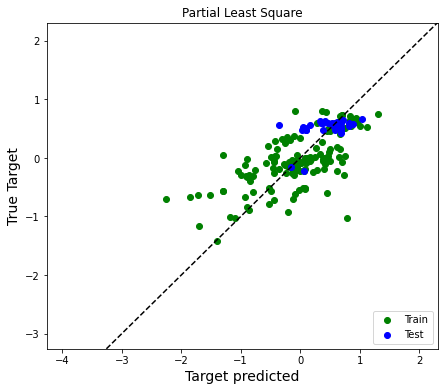

df_SelectKBest.csv
Partial Least Square

TRAIN
	R2 train: 0.96
	RMSE train: 0.14

CROSS-VALIDATION
	Q2 cross-validation: -1.36
	RMSE cross-validation: 0.72

TEST
	R2 test: -0.72
	RMSE test: 0.40


<Figure size 504x432 with 0 Axes>

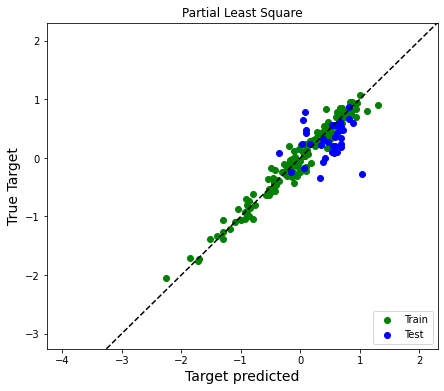

df_pca.csv
Partial Least Square

TRAIN
	R2 train: 0.26
	RMSE train: 0.58

CROSS-VALIDATION
	Q2 cross-validation: 0.08
	RMSE cross-validation: 0.46

TEST
	R2 test: 0.17
	RMSE test: 0.28


<Figure size 504x432 with 0 Axes>

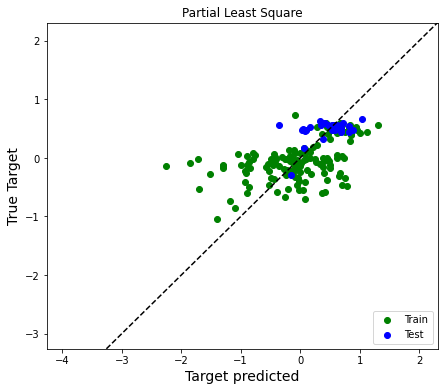

standardized_df.csv
Decision tree regressor

TRAIN
	R2 train: 1.00
	RMSE train: 0.01

CROSS-VALIDATION
	Q2 cross-validation: -0.37
	RMSE cross-validation: 0.34

TEST
	R2 test: -0.23
	RMSE test: 0.34


<Figure size 504x432 with 0 Axes>

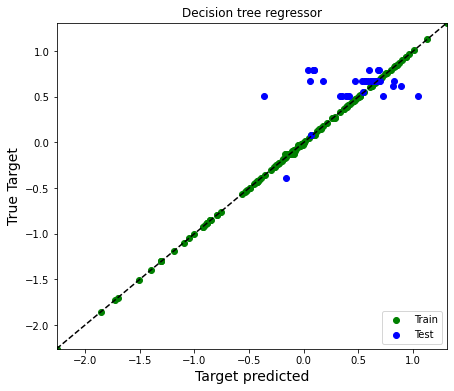

drop_correlated_features.csv
Decision tree regressor

TRAIN
	R2 train: 1.00
	RMSE train: 0.04

CROSS-VALIDATION
	Q2 cross-validation: -0.51
	RMSE cross-validation: 0.36

TEST
	R2 test: -0.65
	RMSE test: 0.39


<Figure size 504x432 with 0 Axes>

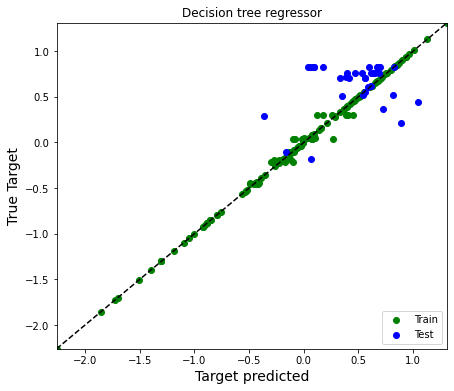

features_correlated_with_y.csv
Decision tree regressor

TRAIN
	R2 train: 0.99
	RMSE train: 0.07

CROSS-VALIDATION
	Q2 cross-validation: -0.26
	RMSE cross-validation: 0.36

TEST
	R2 test: -0.43
	RMSE test: 0.36


<Figure size 504x432 with 0 Axes>

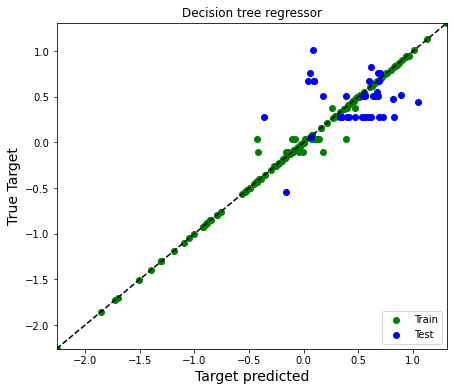

df_SelectKBest.csv
Decision tree regressor

TRAIN
	R2 train: 1.00
	RMSE train: 0.00

CROSS-VALIDATION
	Q2 cross-validation: -0.19
	RMSE cross-validation: 0.32

TEST
	R2 test: -0.36
	RMSE test: 0.35


<Figure size 504x432 with 0 Axes>

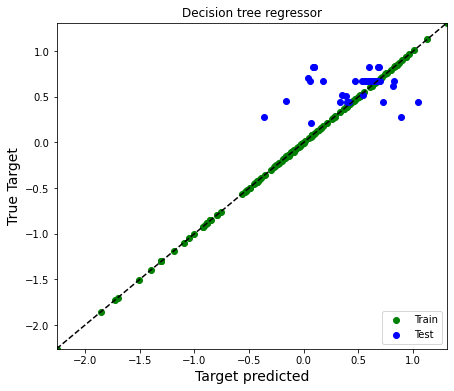

df_pca.csv
Decision tree regressor

TRAIN
	R2 train: 0.99
	RMSE train: 0.05

CROSS-VALIDATION
	Q2 cross-validation: 0.11
	RMSE cross-validation: 0.38

TEST
	R2 test: -0.71
	RMSE test: 0.40


<Figure size 504x432 with 0 Axes>

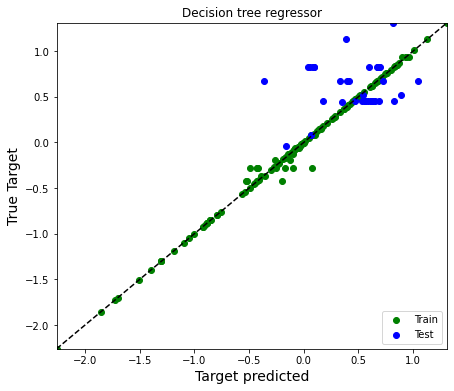

In [17]:
csvList = ('standardized_df.csv', 'drop_correlated_features.csv','features_correlated_with_y.csv', 'df_SelectKBest.csv', 'df_pca.csv')
modelsList = [ridgeRegression, lassoRegression, elasticNet, supportVectorMachine, randomForest, partialLeastSquare, decisionTree]


    
for model in modelsList:
    for csv in csvList:
        df = read_csv_func(csv)
        print(str(csv))
    
        model(df)
    